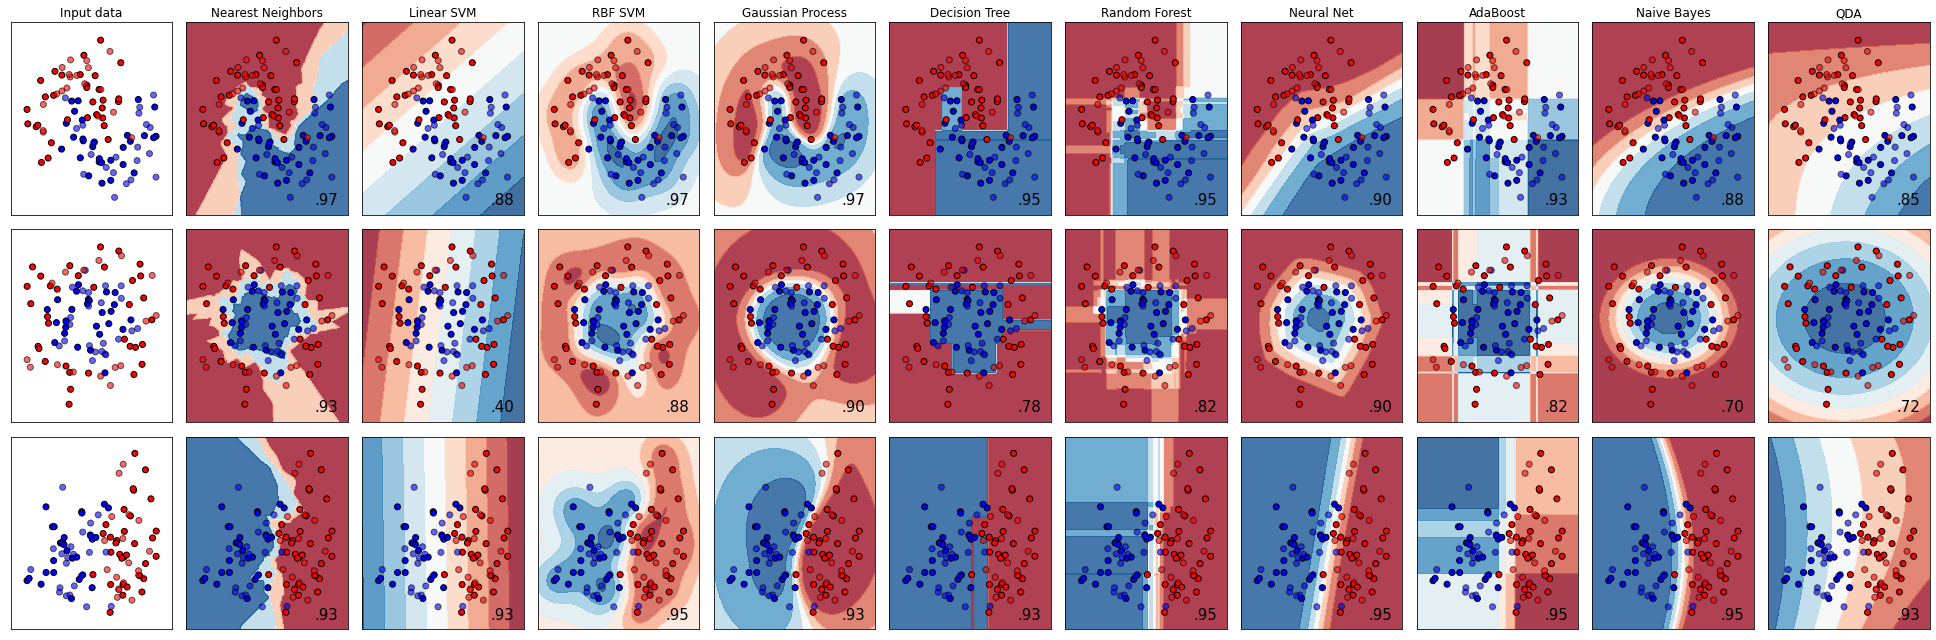

In [1]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

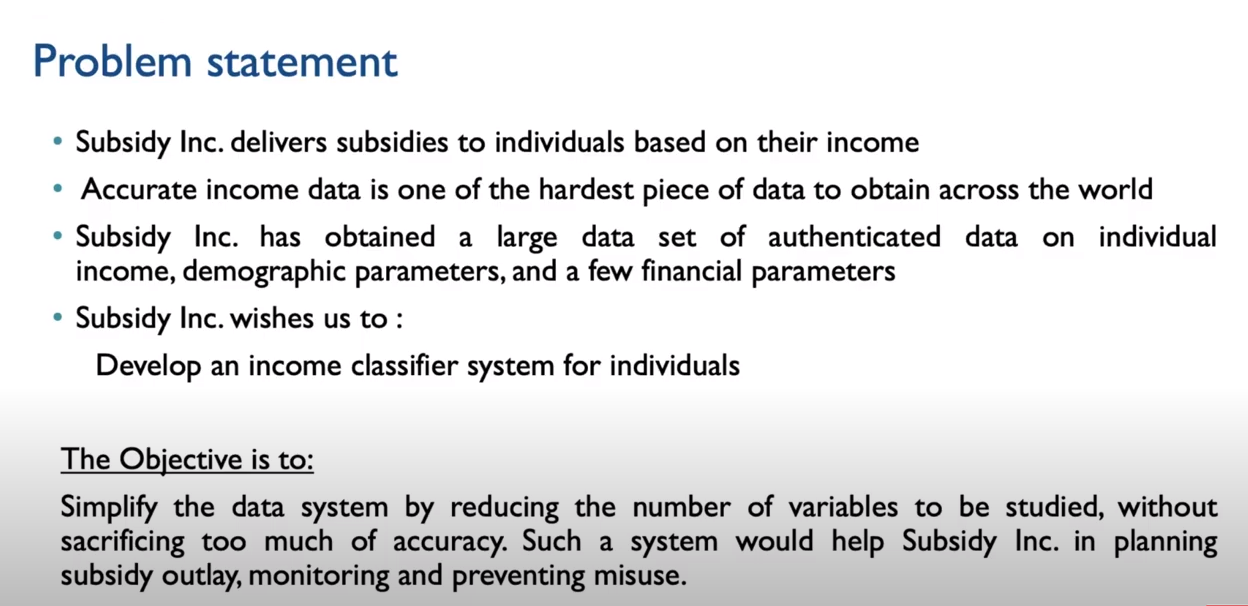

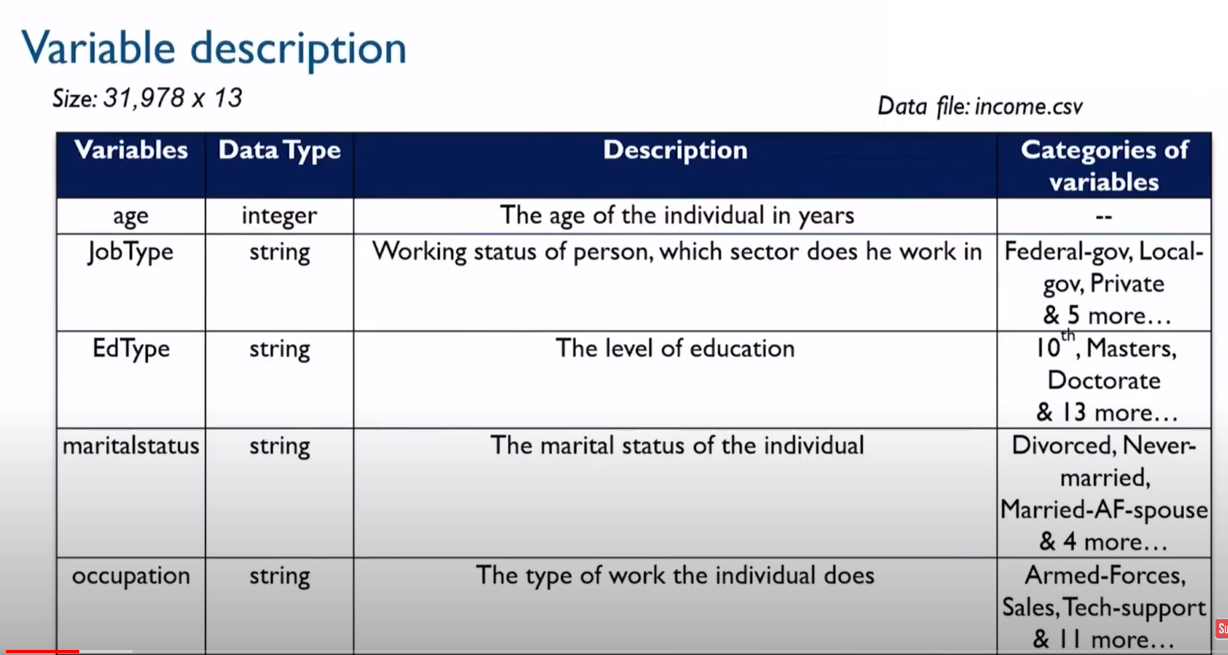

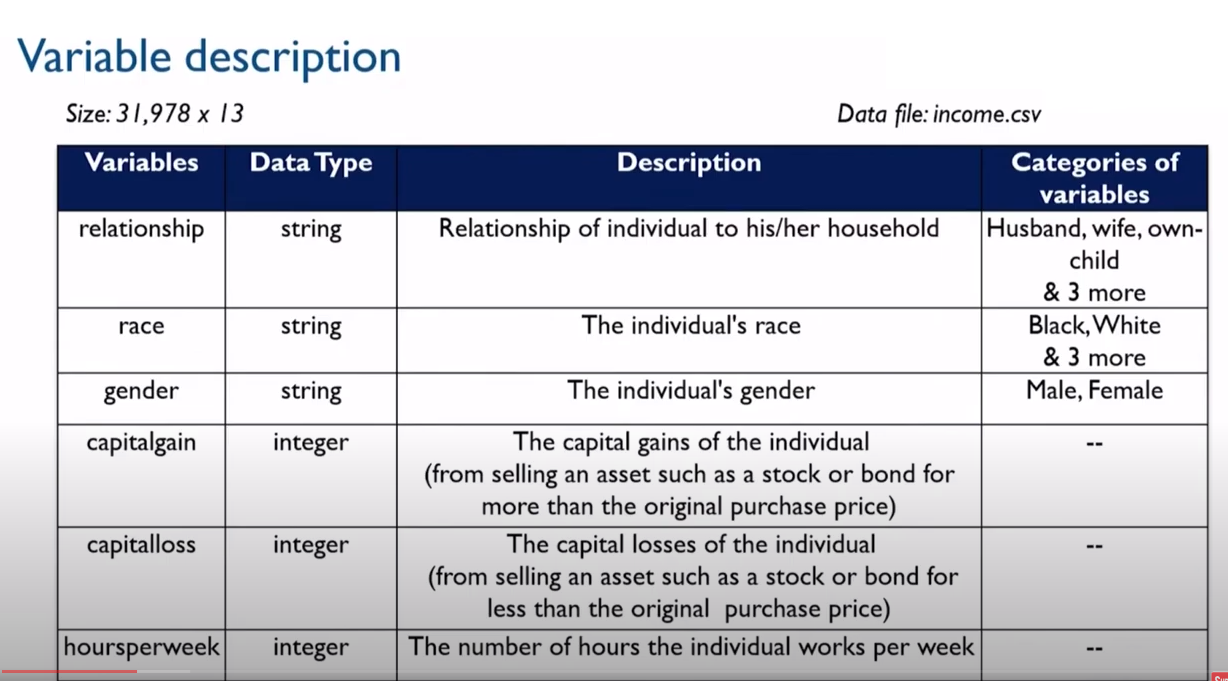

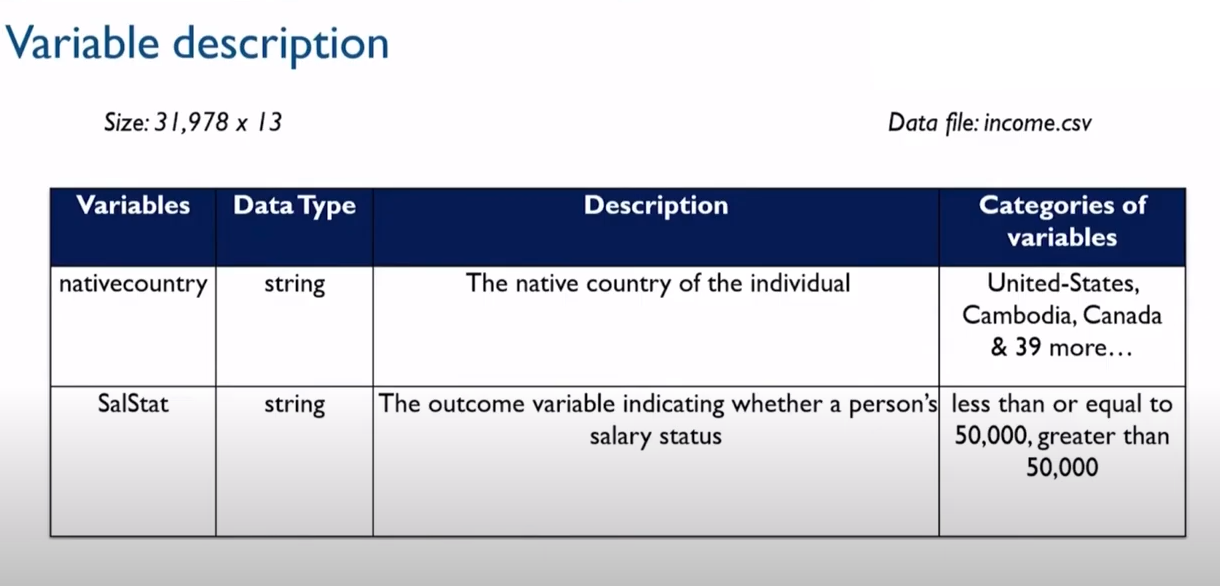

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
df = pd.read_csv('income.csv', na_values=['?'])
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [5]:
df.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [6]:
df.dtypes

age               int64
JobType          object
EdType           object
maritalstatus    object
occupation       object
relationship     object
race             object
gender           object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
nativecountry    object
SalStat          object
dtype: object

## Summary of numerical variables

In [7]:
df.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


## Summaryof categorical variabels 

In [8]:
df.describe(include='O')

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [9]:
df.JobType.value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [10]:
df.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [11]:
df.EdType.value_counts()

 HS-grad         10368
 Some-college     7187
 Bachelors        5210
 Masters          1674
 Assoc-voc        1366
 11th             1167
 Assoc-acdm       1055
 10th              921
 7th-8th           627
 Prof-school       559
 9th               506
 12th              417
 Doctorate         390
 5th-6th           318
 1st-4th           163
 Preschool          50
Name: EdType, dtype: int64

In [12]:
df.maritalstatus.value_counts()

 Married-civ-spouse       14692
 Never-married            10488
 Divorced                  4394
 Separated                 1005
 Widowed                    979
 Married-spouse-absent      397
 Married-AF-spouse           23
Name: maritalstatus, dtype: int64

In [13]:
df.relationship.value_counts()

 Husband           12947
 Not-in-family      8156
 Own-child          5005
 Unmarried          3384
 Wife               1534
 Other-relative      952
Name: relationship, dtype: int64

In [14]:
df.race.value_counts()

 White                 27430
 Black                  3028
 Asian-Pac-Islander      956
 Amer-Indian-Eskimo      311
 Other                   253
Name: race, dtype: int64

In [15]:
df.gender.value_counts()

 Male      21370
 Female    10608
Name: gender, dtype: int64

In [16]:
df.nativecountry.value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

In [17]:
df.SalStat.value_counts()

 less than or equal to 50,000    24283
 greater than 50,000              7695
Name: SalStat, dtype: int64

#### So we can see that JobType and occupation has '?' which should be replaced and we can also observ that there are leading and trailing spaces so we should remove them .

In [18]:
df.JobType.unique()

array([' Private', ' Federal-gov', ' ?', ' Self-emp-inc',
       ' Self-emp-not-inc', ' Local-gov', ' State-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

In [19]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.JobType.unique()

array(['Private', 'Federal-gov', '?', 'Self-emp-inc', 'Self-emp-not-inc',
       'Local-gov', 'State-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [20]:
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [21]:
df.JobType.value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            7
Name: JobType, dtype: int64

In [22]:
df.occupation.value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

In [23]:
observe = df[df.isnull().any(axis=1)].sort_values('JobType')
observe.occupation.unique()

array([nan], dtype=object)

In [24]:
observe.JobType.unique()

array(['Never-worked', nan], dtype=object)

In [25]:
observe

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
4825,18,Never-worked,10th,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
10215,23,Never-worked,7th-8th,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
14073,17,Never-worked,10th,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,"less than or equal to 50,000"
19542,18,Never-worked,11th,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,"less than or equal to 50,000"
22385,20,Never-worked,Some-college,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


**Here we can see that total rows are 1816 with Nan values. Out of 1816rows only 7 are filled with never worked in jobtype column
For never worked person it's general to have Nan occupation. but for the rest of the Job Type we cant tell occupation as we dont know the 
relation between jobtype and occupation. For this particular scenario it's wise to drop tha Nan value rows**

In [26]:
df.dropna(inplace=True)
df.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [27]:
df

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


Text(0.5, 1.0, 'Correlation between features')

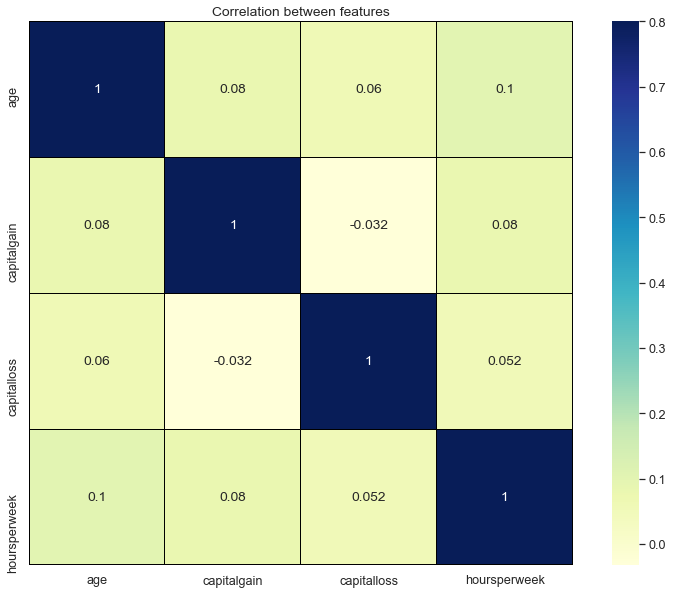

In [28]:
corr = df.corr()
#cmaps = [ 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')

#we can see the variables are not correlated

In [29]:
df.gender.value_counts(normalize=True)

Male      0.675685
Female    0.324315
Name: gender, dtype: float64

In [30]:
pd.crosstab(index=df.gender, columns='count',normalize=True)

col_0,count
gender,
Female,0.324315
Male,0.675685


In [31]:
pd.crosstab(index=df.gender, columns=df.SalStat,normalize='index',margins=True) #proportion of gender vs SalaryStat

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,0.113678,0.886322
Male,0.313837,0.686163
All,0.248922,0.751078


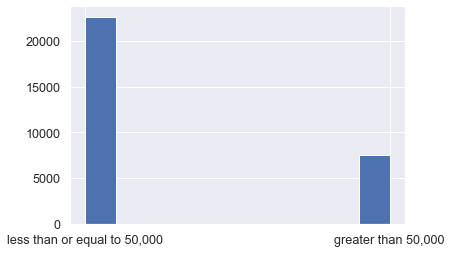

In [32]:
_=plt.hist(df.SalStat)

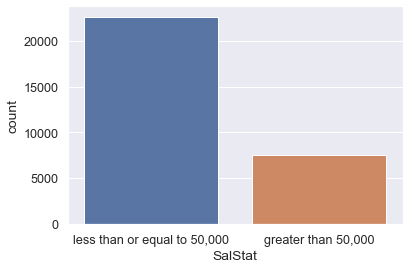

In [33]:
_=sns.countplot(df.SalStat)

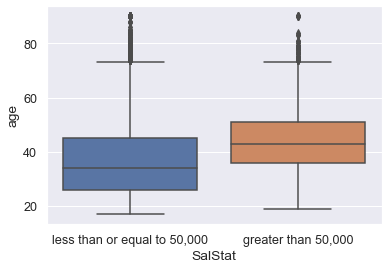

In [34]:
_=sns.boxplot(df.SalStat,df.age)

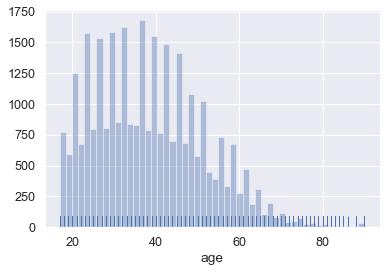

In [35]:
sns.distplot(df.age,kde=False,rug=True)

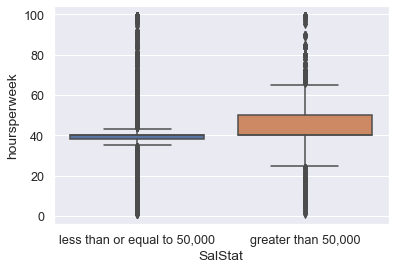

In [36]:
_=sns.boxplot(df.SalStat,df.hoursperweek)

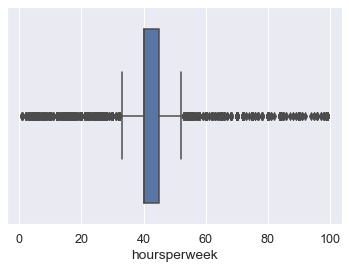

In [37]:
_=sns.boxplot(df.hoursperweek)

In [38]:
df.describe()

,age,capitalgain,capitalloss,hoursperweek
count,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1092.007858,88.372489,40.931238
std,13.134665,7406.346497,404.298370,11.979984
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,47.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


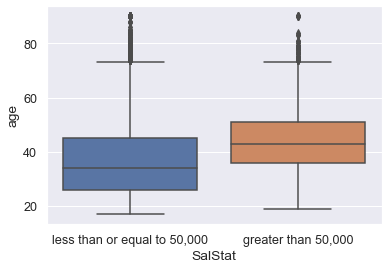

In [39]:
_=sns.boxplot(df.SalStat,df.age)

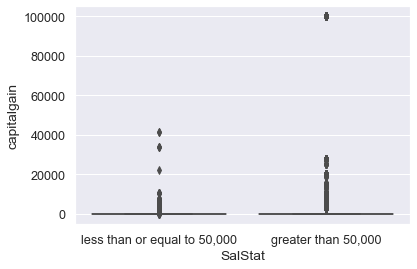

In [40]:
_=sns.boxplot(df.SalStat,df.capitalgain)

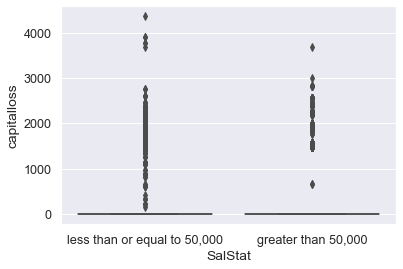

In [41]:
_=sns.boxplot(df.SalStat,df.capitalloss)

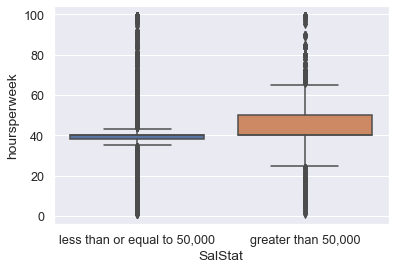

In [42]:
_=sns.boxplot(df.SalStat,df.hoursperweek)

In [43]:
df.drop(['capitalgain', 'capitalloss', 'hoursperweek'],axis=1,inplace=True)

In [44]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,United-States,"less than or equal to 50,000"


In [45]:
df = df[df.age<70]
df

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,United-States,"less than or equal to 50,000"


In [46]:
df.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'nativecountry', 'SalStat'],
      dtype='object')

In [47]:
from sklearn import preprocessing

In [48]:
df = df.applymap(lambda x: x.replace('-',' ') if isinstance(x, str) else x)
df

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
0,45,Private,HS grad,Divorced,Adm clerical,Not in family,White,Female,United States,"less than or equal to 50,000"
1,24,Federal gov,HS grad,Never married,Armed Forces,Own child,White,Male,United States,"less than or equal to 50,000"
2,44,Private,Some college,Married civ spouse,Prof specialty,Husband,White,Male,United States,"greater than 50,000"
3,27,Private,9th,Never married,Craft repair,Other relative,White,Male,Mexico,"less than or equal to 50,000"
4,20,Private,Some college,Never married,Sales,Not in family,White,Male,United States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...
31973,34,Local gov,HS grad,Never married,Farming fishing,Not in family,Black,Male,United States,"less than or equal to 50,000"
31974,34,Local gov,Some college,Never married,Protective serv,Not in family,White,Female,United States,"less than or equal to 50,000"
31975,23,Private,Some college,Married civ spouse,Adm clerical,Husband,White,Male,United States,"less than or equal to 50,000"
31976,42,Local gov,Some college,Married civ spouse,Adm clerical,Wife,White,Female,United States,"less than or equal to 50,000"


In [49]:
df.describe(include='O')

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,29714,29714,29714,29714,29714,29714,29714,29714,29714
unique,7,16,7,14,6,5,2,41,2
top,Private,HS grad,Married civ spouse,Craft repair,Husband,White,Male,United States,"less than or equal to 50,000"
freq,22047,9700,13828,4003,12239,25531,20077,27087,22296


In [50]:
df.race.value_counts()

White                 25531
Black                  2789
Asian Pac Islander      880
Amer Indian Eskimo      284
Other                   230
Name: race, dtype: int64

In [51]:
df.drop( df[ df['race'] == 'Other' ].index , inplace=True)
df.race.value_counts()

White                 25531
Black                  2789
Asian Pac Islander      880
Amer Indian Eskimo      284
Name: race, dtype: int64

In [52]:
df.JobType.value_counts()

Private             21844
Self emp not inc     2384
Local gov            2030
State gov            1264
Self emp inc         1024
Federal gov           925
Without pay            13
Name: JobType, dtype: int64

In [53]:
df.drop( df[ df['JobType'] == 'Without pay' ].index , inplace=True)
df.JobType.value_counts()

Private             21844
Self emp not inc     2384
Local gov            2030
State gov            1264
Self emp inc         1024
Federal gov           925
Name: JobType, dtype: int64

In [54]:
df.EdType.value_counts()

HS grad         9623
Some college    6554
Bachelors       4966
Masters         1595
Assoc voc       1290
11th            1027
Assoc acdm       998
10th             794
Prof school      520
7th 8th          505
9th              433
12th             363
Doctorate        361
5th 6th          268
1st 4th          133
Preschool         41
Name: EdType, dtype: int64

In [55]:
df.maritalstatus.value_counts()

Married civ spouse       13730
Never married             9592
Divorced                  4158
Separated                  922
Widowed                    699
Married spouse absent      349
Married AF spouse           21
Name: maritalstatus, dtype: int64

In [56]:
df.drop( df[ df['maritalstatus'] == 'Married AF spouse' ].index , inplace=True)
df.maritalstatus.value_counts()

Married civ spouse       13730
Never married             9592
Divorced                  4158
Separated                  922
Widowed                    699
Married spouse absent      349
Name: maritalstatus, dtype: int64

In [57]:
df.occupation.value_counts()

Craft repair         3974
Prof specialty       3945
Exec managerial      3900
Adm clerical         3639
Sales                3499
Other service        3112
Machine op inspct    1913
Transport moving     1544
Handlers cleaners    1326
Farming fishing       936
Tech support          904
Protective serv       623
Priv house serv       126
Armed Forces            9
Name: occupation, dtype: int64

In [58]:
df.drop( df[ df['occupation'] == 'Armed Forces' ].index , inplace=True)
df.occupation.value_counts()

Craft repair         3974
Prof specialty       3945
Exec managerial      3900
Adm clerical         3639
Sales                3499
Other service        3112
Machine op inspct    1913
Transport moving     1544
Handlers cleaners    1326
Farming fishing       936
Tech support          904
Protective serv       623
Priv house serv       126
Name: occupation, dtype: int64

In [59]:
df.relationship.value_counts()

Husband           12153
Not in family      7509
Own child          4424
Unmarried          3138
Wife               1371
Other relative      846
Name: relationship, dtype: int64

In [60]:
df.drop('relationship', axis=1,inplace=True)
df.describe(include='O')

,JobType,EdType,maritalstatus,occupation,race,gender,nativecountry,SalStat
count,29441,29441,29441,29441,29441,29441,29441,29441
unique,6,16,6,13,4,2,41,2
top,Private,HS grad,Married civ spouse,Craft repair,White,Male,United States,"less than or equal to 50,000"
freq,21829,9607,13727,3974,25493,19908,26933,22055


In [61]:
df.to_csv('Processed_data.csv',index=False)

In [62]:
df.JobType.unique()

array(['Private', 'Self emp inc', 'Self emp not inc', 'Local gov',
       'State gov', 'Federal gov'], dtype=object)

In [63]:
le_job = preprocessing.LabelEncoder()
le_job.fit(['Private', 'Self emp inc', 'Self emp not inc', 'Local gov',
       'State gov', 'Federal gov'])
df.loc[:, 'JobType'] = le_job.transform(df.loc[:, 'JobType'])
df.JobType.unique()

array([2, 3, 4, 1, 5, 0])

In [64]:
df.maritalstatus.unique()

array(['Divorced', 'Married civ spouse', 'Never married', 'Widowed',
       'Married spouse absent', 'Separated'], dtype=object)

In [65]:
le_marital = preprocessing.LabelEncoder()
le_marital.fit(['Divorced', 'Married civ spouse', 'Never married', 'Widowed',
       'Married spouse absent', 'Separated'])
df.loc[:, 'maritalstatus'] = le_marital.transform(df.loc[:, 'maritalstatus'])
df.maritalstatus.unique()

array([0, 1, 3, 5, 2, 4])

In [66]:
df.race.unique()

array(['White', 'Black', 'Amer Indian Eskimo', 'Asian Pac Islander'],
      dtype=object)

In [67]:
le_race = preprocessing.LabelEncoder()
le_race.fit(['White', 'Black', 'Amer Indian Eskimo', 'Asian Pac Islander'])
df.race = le_race.transform(df.race)
df.race.unique()

array([3, 2, 0, 1])

In [68]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [69]:
le_gen = preprocessing.LabelEncoder()
le_gen.fit(['Female', 'Male'])
df.gender = le_gen.transform(df.gender)
df.gender.unique()

array([0, 1])

In [70]:
dummies = (pd.get_dummies(df.EdType))
df = pd.concat([df, dummies], axis='columns') 
df = df.drop('EdType',axis='columns')

In [71]:
dummies = (pd.get_dummies(df.nativecountry))
df = pd.concat([df, dummies], axis='columns') 
df = df.drop('nativecountry',axis='columns')
df

,age,JobType,maritalstatus,occupation,race,gender,SalStat,10th,11th,12th,...,Portugal,Puerto Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United States,Vietnam,Yugoslavia
0,45,2,0,Adm clerical,3,0,"less than or equal to 50,000",0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,2,1,Prof specialty,3,1,"greater than 50,000",0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,2,3,Craft repair,3,1,"less than or equal to 50,000",0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,2,3,Sales,3,1,"less than or equal to 50,000",0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,44,2,5,Exec managerial,2,0,"less than or equal to 50,000",0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,1,3,Farming fishing,2,1,"less than or equal to 50,000",0,0,0,...,0,0,0,0,0,0,0,1,0,0
31974,34,1,3,Protective serv,3,0,"less than or equal to 50,000",0,0,0,...,0,0,0,0,0,0,0,1,0,0
31975,23,2,1,Adm clerical,3,1,"less than or equal to 50,000",0,0,0,...,0,0,0,0,0,0,0,1,0,0
31976,42,1,1,Adm clerical,3,0,"less than or equal to 50,000",0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [72]:
dummies = (pd.get_dummies(df.occupation))
df = pd.concat([df, dummies], axis='columns') 
df = df.drop('occupation',axis='columns')
df

,age,JobType,maritalstatus,race,gender,SalStat,10th,11th,12th,1st 4th,...,Farming fishing,Handlers cleaners,Machine op inspct,Other service,Priv house serv,Prof specialty,Protective serv,Sales,Tech support,Transport moving
0,45,2,0,3,0,"less than or equal to 50,000",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44,2,1,3,1,"greater than 50,000",0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,27,2,3,3,1,"less than or equal to 50,000",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,2,3,3,1,"less than or equal to 50,000",0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,44,2,5,2,0,"less than or equal to 50,000",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,1,3,2,1,"less than or equal to 50,000",0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
31974,34,1,3,3,0,"less than or equal to 50,000",0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31975,23,2,1,3,1,"less than or equal to 50,000",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31976,42,1,1,3,0,"less than or equal to 50,000",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df.age=df.age.astype('int')
df.JobType=df.JobType.astype('int')
df.maritalstatus=df.maritalstatus.astype('int')
df.race=df.race.astype('int')
df.gender=df.gender.astype('int')

In [74]:
df.dtypes

age                 int32
JobType             int32
maritalstatus       int32
race                int32
gender              int32
                    ...  
Prof specialty      uint8
Protective serv     uint8
Sales               uint8
Tech support        uint8
Transport moving    uint8
Length: 76, dtype: object

In [75]:
clm = df.columns

In [76]:
for col in clm:
    try:
        df[col]=  df[col].astype('int')
    except:
        pass
df.dtypes  

age                 int32
JobType             int32
maritalstatus       int32
race                int32
gender              int32
                    ...  
Prof specialty      int32
Protective serv     int32
Sales               int32
Tech support        int32
Transport moving    int32
Length: 76, dtype: object

In [77]:
df.describe(include='O')

,SalStat
count,29441
unique,2
top,"less than or equal to 50,000"
freq,22055


In [78]:
x = df.drop('SalStat',axis=1)
y = df.SalStat

In [79]:
x = x.values

In [80]:
X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
X[0:5]

array([[ 5.71850460e-01, -2.04861575e-01, -1.34739258e+00,
         3.54496691e-01, -1.44510372e+00, -1.66483301e-01,
        -1.90116160e-01, -1.11574398e-01, -6.73647541e-02,
        -9.58466308e-02, -1.32107186e-01, -1.22175762e-01,
        -1.87220001e-01, -2.13979334e-01, -4.50172443e-01,
        -1.11418267e-01,  1.43684943e+00, -2.39251655e-01,
        -3.73437789e-02, -1.34089576e-01, -5.34866782e-01,
        -2.47339100e-02, -5.92520472e-02, -4.81149793e-02,
        -4.08303846e-02, -5.41262804e-02, -4.04109129e-02,
        -2.40366315e-02, -5.68967351e-02, -5.31711206e-02,
        -3.02973635e-02, -6.52984165e-02, -3.14005113e-02,
        -4.48110715e-02, -3.77970901e-02, -5.82815505e-03,
        -2.01930942e-02, -2.54121087e-02, -2.01930942e-02,
        -5.68967351e-02, -3.68849284e-02, -2.85631717e-02,
        -4.77590694e-02, -5.18705351e-02, -4.44289377e-02,
        -2.40366315e-02, -1.40635403e-01, -3.14005113e-02,
        -2.18117757e-02, -3.14005113e-02, -7.90866586e-0

In [81]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)

# KNN

In [82]:
#itterating to find the best k value
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc



array([0.76583461, 0.74460859, 0.79640007, 0.7887587 , 0.80455086,
       0.79928681, 0.80641875, 0.80455086, 0.80607913])

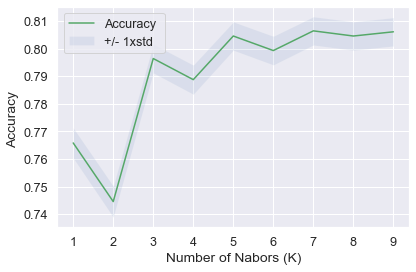

In [83]:
#Plot model accuracy for Different number of Neighbors

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10) #showing 68% data
plt.legend(('Accuracy ', '+/- 1xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()


In [84]:
#7 is the best value of k
#Training

#Lets start the algorithm with k=4 for now:

k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [85]:
neigh.score(X_test, y_test)

0.8064187468160978

In [86]:
#cross validation
from sklearn.model_selection import cross_val_score
print(cross_val_score(neigh, X, y, cv=10)) #cv=10 is more prefferable 
cross_val_score(neigh, X, y, cv=4).mean()

[0.80509338 0.81216033 0.80910326 0.80672554 0.80808424 0.80808424
 0.80774457 0.81182065 0.82744565 0.80366848]


0.8087700564963408

In [87]:
yhat = neigh.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))


                              precision    recall  f1-score   support

         greater than 50,000       0.65      0.55      0.60      1520
less than or equal to 50,000       0.85      0.89      0.87      4369

                    accuracy                           0.81      5889
                   macro avg       0.75      0.72      0.73      5889
                weighted avg       0.80      0.81      0.80      5889



In [88]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, yhat)


array([[ 841,  679],
       [ 461, 3908]], dtype=int64)

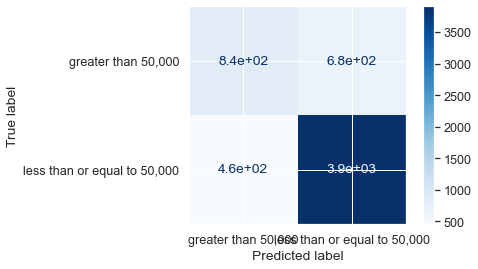

In [89]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(neigh, X_test, y_test,cmap=plt.cm.Blues)
plt.show()


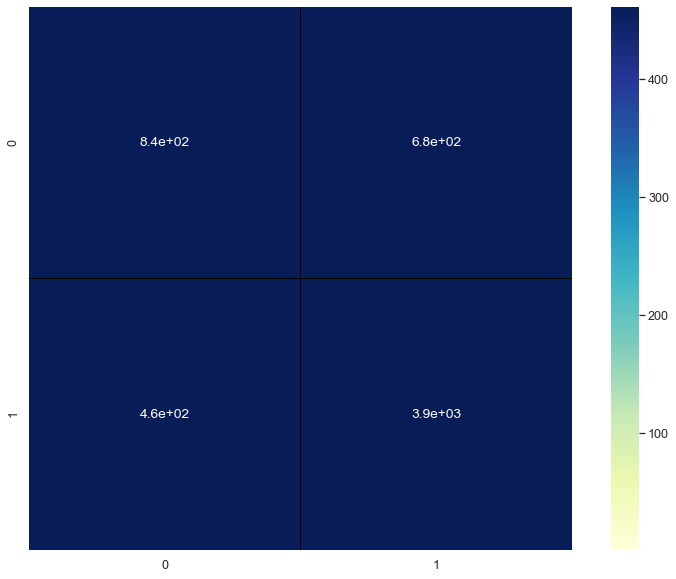

In [90]:
corr = confusion_matrix(y_test, yhat).astype('int32')
#cmaps = [ 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")


#we can see the variables are not correlated

# Decision Tree

In [91]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4) #max_depth maximum depth of tree
drugTree.fit(X_train,y_train) 


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [92]:
predTree = drugTree.predict(X_test)
predTree


array(['less than or equal to 50,000', 'less than or equal to 50,000',
       'less than or equal to 50,000', ...,
       'less than or equal to 50,000', 'less than or equal to 50,000',
       'less than or equal to 50,000'], dtype=object)

In [93]:
print (predTree [0:5])
print (y_test [0:5])



['less than or equal to 50,000' 'less than or equal to 50,000'
 'less than or equal to 50,000' 'less than or equal to 50,000'
 'less than or equal to 50,000']
7892     less than or equal to 50,000
18495             greater than 50,000
19960    less than or equal to 50,000
22274    less than or equal to 50,000
7360     less than or equal to 50,000
Name: SalStat, dtype: object


In [94]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))


DecisionTrees's Accuracy:  0.7991169977924945


In [95]:
drugTree.score(X_test, y_test)

0.7991169977924945

In [96]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(drugTree, X, y, cv=10)) #cv=10 is more prefferable 
cross_val_score(drugTree, X, y, cv=10).mean()

[0.79966044 0.7955163  0.80129076 0.79925272 0.8060462  0.80536685
 0.80706522 0.81419837 0.80876359 0.79177989]


0.8028940332730494

In [97]:
print(classification_report(y_test, predTree))

                              precision    recall  f1-score   support

         greater than 50,000       0.72      0.37      0.49      1520
less than or equal to 50,000       0.81      0.95      0.88      4369

                    accuracy                           0.80      5889
                   macro avg       0.76      0.66      0.68      5889
                weighted avg       0.79      0.80      0.77      5889



In [98]:
confusion_matrix(y_test, yhat)

array([[ 841,  679],
       [ 461, 3908]], dtype=int64)

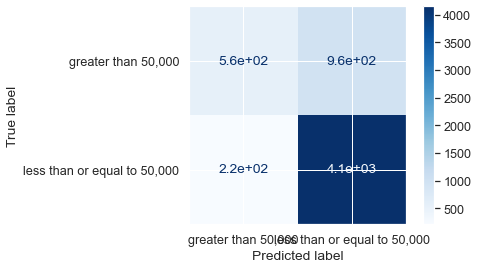

In [99]:
plot_confusion_matrix(drugTree, X_test, y_test,cmap=plt.cm.Blues)
plt.show()

# SVM


In [100]:
clf = SVC(kernel='poly')
clf.fit(X_train, y_train) 


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [101]:
yhat = clf.predict(X_test)
print(y_test[0:5])
yhat [0:5]


7892     less than or equal to 50,000
18495             greater than 50,000
19960    less than or equal to 50,000
22274    less than or equal to 50,000
7360     less than or equal to 50,000
Name: SalStat, dtype: object


array(['less than or equal to 50,000', 'less than or equal to 50,000',
       'less than or equal to 50,000', 'less than or equal to 50,000',
       'less than or equal to 50,000'], dtype=object)

In [102]:
print(clf.score(X_test, y_test))
print("SVM's Accuracy: ", metrics.accuracy_score(y_test, yhat))

0.7846833078621158
SVM's Accuracy:  0.7846833078621158


[[ 453 1067]
 [ 201 4168]]


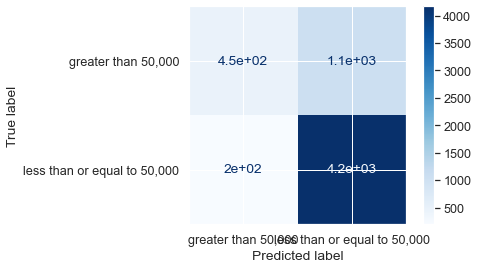

In [103]:
# Compute confusion matrix
cm = confusion_matrix(y_test, yhat)
print(cm)

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)
plt.show()


In [104]:
print(classification_report(y_test, yhat))

                              precision    recall  f1-score   support

         greater than 50,000       0.69      0.30      0.42      1520
less than or equal to 50,000       0.80      0.95      0.87      4369

                    accuracy                           0.78      5889
                   macro avg       0.74      0.63      0.64      5889
                weighted avg       0.77      0.78      0.75      5889



# Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
yhat = LR.predict(X_test)
yhat


array(['less than or equal to 50,000', 'greater than 50,000',
       'less than or equal to 50,000', ...,
       'less than or equal to 50,000', 'less than or equal to 50,000',
       'less than or equal to 50,000'], dtype=object)

In [107]:
yhat_prob = LR.predict_proba(X_test[0:1])
print(LR.predict(X_test[0:1]))
print(y_test[0:1])
yhat_prob

['less than or equal to 50,000']
7892    less than or equal to 50,000
Name: SalStat, dtype: object


array([[0.04854716, 0.95145284]])

In [108]:
print("LR's Accuracy: ", metrics.accuracy_score(y_test, yhat))


LR's Accuracy:  0.8026829682458821


In [109]:
# Compute confusion matrix
cm = confusion_matrix(y_test, yhat)
print(cm)

[[ 687  833]
 [ 329 4040]]


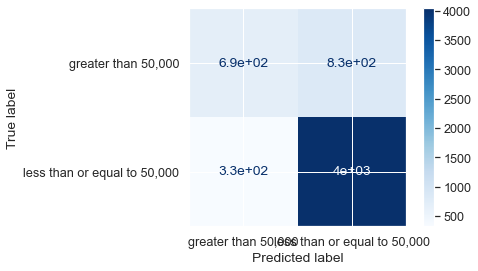

In [110]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(LR, X_test, y_test,cmap=plt.cm.Blues)
plt.show()


In [111]:
print(classification_report(y_test, yhat))

                              precision    recall  f1-score   support

         greater than 50,000       0.68      0.45      0.54      1520
less than or equal to 50,000       0.83      0.92      0.87      4369

                    accuracy                           0.80      5889
                   macro avg       0.75      0.69      0.71      5889
                weighted avg       0.79      0.80      0.79      5889



# RandomForestClassifier

In [112]:
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [113]:
yhat = rfc.predict(X_test)
yhat


array(['less than or equal to 50,000', 'less than or equal to 50,000',
       'less than or equal to 50,000', ...,
       'less than or equal to 50,000', 'less than or equal to 50,000',
       'less than or equal to 50,000'], dtype=object)

In [114]:
print("RandomForestClassifier's Accuracy: ", metrics.accuracy_score(y_test, yhat))


RandomForestClassifier's Accuracy:  0.7418916624214638


In [115]:
cm = confusion_matrix(y_test, yhat)
print(cm)

[[   0 1520]
 [   0 4369]]


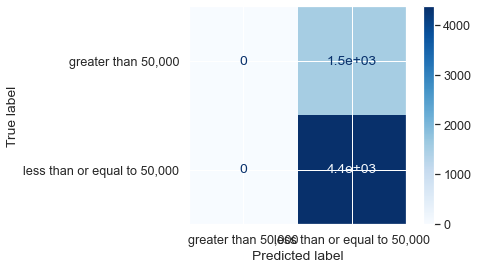

In [116]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(rfc, X_test, y_test,cmap=plt.cm.Blues)
plt.show()


In [117]:
print(classification_report(y_test, yhat))

                              precision    recall  f1-score   support

         greater than 50,000       0.00      0.00      0.00      1520
less than or equal to 50,000       0.74      1.00      0.85      4369

                    accuracy                           0.74      5889
                   macro avg       0.37      0.50      0.43      5889
                weighted avg       0.55      0.74      0.63      5889



C:\Users\Notebook\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# AdaBoostClassifier

In [118]:
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4),
    n_estimators=200
)
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=4,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [119]:
yhat = ada.predict(X_test)
yhat

array(['less than or equal to 50,000', 'greater than 50,000',
       'less than or equal to 50,000', ...,
       'less than or equal to 50,000', 'less than or equal to 50,000',
       'less than or equal to 50,000'], dtype=object)

In [120]:
print("AdaBoostClassifier's Accuracy: ", metrics.accuracy_score(y_test, yhat))


AdaBoostClassifier's Accuracy:  0.8108337578536254


In [121]:
cm = confusion_matrix(y_test, yhat)
print(cm)

[[ 865  655]
 [ 459 3910]]


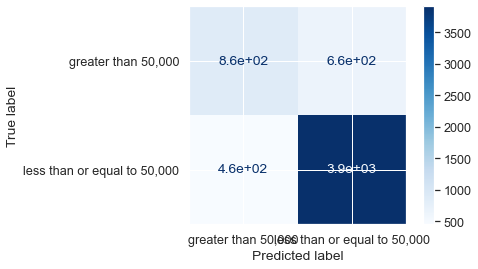

In [122]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(ada, X_test, y_test,cmap=plt.cm.Blues)
plt.show()

In [123]:
print(classification_report(y_test, yhat))

                              precision    recall  f1-score   support

         greater than 50,000       0.65      0.57      0.61      1520
less than or equal to 50,000       0.86      0.89      0.88      4369

                    accuracy                           0.81      5889
                   macro avg       0.75      0.73      0.74      5889
                weighted avg       0.80      0.81      0.81      5889



# GaussianNB

In [124]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [125]:
yhat = gnb.predict(X_test)
yhat

array(['less than or equal to 50,000', 'greater than 50,000',
       'less than or equal to 50,000', ..., 'greater than 50,000',
       'greater than 50,000', 'less than or equal to 50,000'],
      dtype='<U28')

In [126]:
print("GaussianNB's Accuracy: ", metrics.accuracy_score(y_test, yhat))


GaussianNB's Accuracy:  0.3827474953302768


In [127]:
cm = confusion_matrix(y_test, yhat)
print(cm)

[[1463   57]
 [3578  791]]


In [128]:
print(classification_report(y_test, yhat))

                              precision    recall  f1-score   support

         greater than 50,000       0.29      0.96      0.45      1520
less than or equal to 50,000       0.93      0.18      0.30      4369

                    accuracy                           0.38      5889
                   macro avg       0.61      0.57      0.37      5889
                weighted avg       0.77      0.38      0.34      5889



# QuadraticDiscriminantAnalysis

In [129]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

C:\Users\Notebook\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [130]:
yhat = qda.predict(X_test)
yhat

array(['less than or equal to 50,000', 'greater than 50,000',
       'less than or equal to 50,000', ..., 'greater than 50,000',
       'greater than 50,000', 'less than or equal to 50,000'],
      dtype=object)

In [131]:
print("QuadraticDiscriminantAnalysis's Accuracy: ", metrics.accuracy_score(y_test, yhat))


QuadraticDiscriminantAnalysis's Accuracy:  0.3949736797418917


In [132]:
cm = confusion_matrix(y_test, yhat)
print(cm)

[[1412  108]
 [3455  914]]


In [133]:
print(classification_report(y_test, yhat))

                              precision    recall  f1-score   support

         greater than 50,000       0.29      0.93      0.44      1520
less than or equal to 50,000       0.89      0.21      0.34      4369

                    accuracy                           0.39      5889
                   macro avg       0.59      0.57      0.39      5889
                weighted avg       0.74      0.39      0.37      5889



# From the Analysis we can say that AdaBoostClassifier has the Highest score. So we'll Use AdaBoostClassifier to make our model

In [134]:
import pickle #to export our model
with open('Subsidy Classifier.pickle', 'wb') as f:
    pickle.dump(ada, f)

In [135]:
columns= df.drop('SalStat',axis=1).columns
columns
import json
columnss = { 'data columns': [col.lower() for col in columns]}
columnss

{'data columns': ['age',
  'jobtype',
  'maritalstatus',
  'race',
  'gender',
  '10th',
  '11th',
  '12th',
  '1st 4th',
  '5th 6th',
  '7th 8th',
  '9th',
  'assoc acdm',
  'assoc voc',
  'bachelors',
  'doctorate',
  'hs grad',
  'masters',
  'preschool',
  'prof school',
  'some college',
  'cambodia',
  'canada',
  'china',
  'columbia',
  'cuba',
  'dominican republic',
  'ecuador',
  'el salvador',
  'england',
  'france',
  'germany',
  'greece',
  'guatemala',
  'haiti',
  'holand netherlands',
  'honduras',
  'hong',
  'hungary',
  'india',
  'iran',
  'ireland',
  'italy',
  'jamaica',
  'japan',
  'laos',
  'mexico',
  'nicaragua',
  'outlying us(guam usvi etc)',
  'peru',
  'philippines',
  'poland',
  'portugal',
  'puerto rico',
  'scotland',
  'south',
  'taiwan',
  'thailand',
  'trinadad&tobago',
  'united states',
  'vietnam',
  'yugoslavia',
  'adm clerical',
  'craft repair',
  'exec managerial',
  'farming fishing',
  'handlers cleaners',
  'machine op inspct',
  

In [136]:
with open('columns.json', 'w') as f:
    f.write(json.dumps(columnss))

# Predicting Dynamically (Diployable)

In [137]:
with open('columns.json', 'r') as f:
        data_columns = json.load(f)['data columns']
data_columns

['age',
 'jobtype',
 'maritalstatus',
 'race',
 'gender',
 '10th',
 '11th',
 '12th',
 '1st 4th',
 '5th 6th',
 '7th 8th',
 '9th',
 'assoc acdm',
 'assoc voc',
 'bachelors',
 'doctorate',
 'hs grad',
 'masters',
 'preschool',
 'prof school',
 'some college',
 'cambodia',
 'canada',
 'china',
 'columbia',
 'cuba',
 'dominican republic',
 'ecuador',
 'el salvador',
 'england',
 'france',
 'germany',
 'greece',
 'guatemala',
 'haiti',
 'holand netherlands',
 'honduras',
 'hong',
 'hungary',
 'india',
 'iran',
 'ireland',
 'italy',
 'jamaica',
 'japan',
 'laos',
 'mexico',
 'nicaragua',
 'outlying us(guam usvi etc)',
 'peru',
 'philippines',
 'poland',
 'portugal',
 'puerto rico',
 'scotland',
 'south',
 'taiwan',
 'thailand',
 'trinadad&tobago',
 'united states',
 'vietnam',
 'yugoslavia',
 'adm clerical',
 'craft repair',
 'exec managerial',
 'farming fishing',
 'handlers cleaners',
 'machine op inspct',
 'other service',
 'priv house serv',
 'prof specialty',
 'protective serv',
 'sales',

In [138]:
with open('Subsidy Classifier.pickle', 'rb') as f:
    model = pickle.load(f)

In [139]:
def predict_subsidy(age,Jobtype,EdType,maritalstatus,occupation,race,gender,nativecountry):
     # [0] index e ekta list ase so oitar [0] index e column value ta ase. That what we need
    Ed = data_columns.index(EdType.lower())
    occ = data_columns.index(occupation.lower())
    nativ = data_columns.index(nativecountry.lower())
    x = np.zeros(len(data_columns))
    x[0] = age
    x[1] = Jobtype
    x[2] = maritalstatus
    x[3] = race
    x[4] = gender
    if Ed >= 0:
        x[Ed] = 1
    if occ >= 0:
        x[occ] = 1
    if nativ >= 0:
        x[nativ] = 1

    return model.predict([x])[0]

In [140]:
df.head(2)

,age,JobType,maritalstatus,race,gender,SalStat,10th,11th,12th,1st 4th,...,Farming fishing,Handlers cleaners,Machine op inspct,Other service,Priv house serv,Prof specialty,Protective serv,Sales,Tech support,Transport moving
0,45,2,0,3,0,"less than or equal to 50,000",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44,2,1,3,1,"greater than 50,000",0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [141]:
age=int(input())
job=input().lower()
Edtype=input().lower()
maritalstat=input().lower()
occupation=input().lower()
race=input().lower()
gender=input().lower()
nativecountry=input().lower()



45
private
bachelors
divorced
sales
white
male
united states


In [142]:
if job =='private':
    job=2
elif job=='self emp inc':
    job=3
elif job=='self emp not inc':
    job=4
elif job=='local gov':
    job=1
elif job=='state gov':
    job=5
elif job=='federal gov':
    job=0

    
if maritalstat == 'divorced':
    maritalstat=0
elif maritalstat=='married civ spouse':
    maritalstat=1
elif maritalstat=='never married':
    maritalstat=3
elif maritalstat=='widowed':
    maritalstat=5
elif maritalstat=='married spouse absent':
    maritalstat=2
elif maritalstat=='separated':
    maritalstat=4
    

    
if race=='white':
    race=3
elif race=='black':
    race=2
elif race=='amer indian eskimo':
    race=0
elif race=='asian pac islander':
    race=1
    

if gender=='female':
    gender=0
elif gender=='male':
    gender=1

In [143]:
print(job,maritalstat,race,gender)

2 0 3 1


In [144]:
predict_subsidy(age,job,Edtype,maritalstat,occupation,race,gender,nativecountry)

'less than or equal to 50,000'

In [146]:
df.to_csv('model.csv',index=False)